<a href="https://colab.research.google.com/github/DanTimson/MIR/blob/main/MIR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install seaborn pandas kaggle

In [2]:
# from google.colab import files
# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d imsparsh/deam-mediaeval-dataset-emotional-analysis-in-music

100% 1.83G/1.83G [00:25<00:00, 67.0MB/s]
100% 1.83G/1.83G [00:25<00:00, 78.2MB/s]


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!unzip 'deam-mediaeval-dataset-emotional-analysis-in-music.zip'
%rm 'deam-mediaeval-dataset-emotional-analysis-in-music.zip'

In [18]:
# Load averaged annotations for arousal
arousal_avg = pd.read_csv('/content/DEAM_Annotations/annotations/annotations averaged per song/dynamic (per second annotations)/arousal.csv')
# Load averaged annotations for valence
valence_avg = pd.read_csv('/content/DEAM_Annotations/annotations/annotations averaged per song/dynamic (per second annotations)/valence.csv')

In [19]:
# Set a threshold for the maximum number of NaN values allowed in a row
nan_threshold = 65  # Adjust as needed

# Filter rows with almost no NaNs for arousal
arousal_avg_long = arousal_avg.dropna(thresh=nan_threshold)

print(arousal_avg_long.info())
print(arousal_avg_long.isnull().sum())

# Filter rows with almost no NaNs for valence
valence_avg_long = valence_avg.dropna(thresh=nan_threshold)

print(valence_avg_long.head())
print(valence_avg_long.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 1744 to 1801
Columns: 1225 entries, song_id to sample_626500ms
dtypes: float64(1224), int64(1)
memory usage: 555.5 KB
None
song_id             0
sample_15000ms      0
sample_15500ms      0
sample_16000ms      0
sample_16500ms      0
                   ..
sample_624500ms    57
sample_625000ms    57
sample_625500ms    57
sample_626000ms    57
sample_626500ms    57
Length: 1225, dtype: int64
      song_id  sample_15000ms  sample_15500ms  sample_16000ms  sample_16500ms  \
1744     2001          -0.106          -0.108          -0.108          -0.102   
1745     2002           0.156           0.158           0.160           0.160   
1746     2003           0.240           0.248           0.220           0.238   
1747     2004           0.108           0.118           0.130           0.130   
1748     2005           0.010           0.012           0.030           0.022   

      sample_17000ms  sample_17500ms  sample_18000ms  sampl

In [ ]:
# Remove empty sample columns and trim the outlying songs
arousal_avg = arousal_avg.dropna(axis=1, thresh=60).drop('song_id', axis = 1)
print("Arousal Information:")
print(arousal_avg.info())
print("First few rows of Arousal:")
print(arousal_avg.head())
# Check for missing values
print("\nMissing Values:")
print(arousal_avg.isnull().sum())
# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(arousal_avg.describe())

# Remove empty sample columns and trim the outlying songs
valence_avg = valence_avg.dropna(axis=1, thresh=60).drop('song_id', axis = 1)
print("\nValence Information:")
print(valence_avg.info())
print("First few rows of Valence:")
print(valence_avg.head())
# Check for missing values
print("\nMissing Values:")
print(valence_avg.isnull().sum())
# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(valence_avg.describe())

0      -0.197517
1      -0.193187
2       0.243072
3      -0.236207
4       0.376292
          ...   
1797   -0.164700
1798    0.006267
1799   -0.046433
1800    0.348889
1801    0.078233
Name: Arousal_mean, Length: 1802, dtype: float64
0      -0.215511
1      -0.265855
2       0.155210
3       0.140160
4       0.332455
          ...   
1797    0.092400
1798    0.048800
1799    0.162600
1800   -0.167500
1801   -0.193800
Name: Valence_mean, Length: 1802, dtype: float64


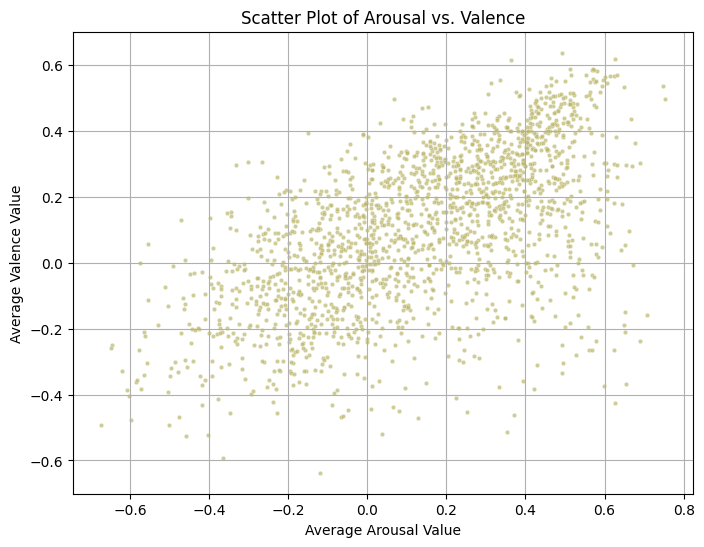

In [25]:
# Compute the average for each row
arousal_avg['Arousal_mean'] = arousal_avg.mean(axis=1)
valence_avg['Valence_mean'] = valence_avg.mean(axis=1)
print(arousal_avg['Arousal_mean'])
print(valence_avg['Valence_mean'])

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=arousal_avg['Arousal_mean'], y=valence_avg['Valence_mean'], color = 'darkkhaki', s = 10, alpha=0.7)
plt.title('Scatter Plot of Arousal vs. Valence')
plt.xlabel('Average Arousal Value')
plt.ylabel('Average Valence Value')
plt.grid(True)
plt.show()

In [65]:
import numpy as np

num_regions = 12

df = pd.concat([arousal_avg['Arousal_mean'], valence_avg['Valence_mean']], axis=1)

# Create a new column for emotional category
df['Emotion_Category'] = ''

def find_region(arousal, valence):
    angle = np.arctan2(arousal, valence)
    angle = (angle + 2 * np.pi) % (2 * np.pi)  # Ensure angle is between 0 and 2*pi
    region = int(np.floor(angle / (2 * np.pi / num_regions)))
    return region

df

,Arousal_mean,Valence_mean,Emotion_Category
0,-0.197517,-0.215511,
1,-0.193187,-0.265855,
2,0.243072,0.155210,
3,-0.236207,0.140160,
4,0.376292,0.332455,
...,...,...,...
1797,-0.164700,0.092400,
1798,0.006267,0.048800,
1799,-0.046433,0.162600,
1800,0.348889,-0.167500,


In [66]:
# Map region numbers to emotion names
region_to_emotion = {
    0: 'Pleased',
    1: 'Happy',
    2: 'Excited',
    3: 'Annoying',
    4: 'Angry',
    5: 'Nervous',
    6: 'Sad',
    7: 'Bored',
    8: 'Sleepy',
    9: 'Calm',
    10: 'Peaceful',
    11: 'Relaxed'
}

In [67]:
# Categorize each data point
for index, row in df.iterrows():
    region = find_region(row['Arousal_mean'], row['Valence_mean'])
    df.at[index, 'Emotion_Category'] = region_to_emotion[region]



# Count occurrences of each emotion category
emotion_counts = df['Emotion_Category'].value_counts()

# Display the counts
print(emotion_counts)

df

Happy       548
Excited     255
Pleased     166
Bored       155
Sleepy      150
Annoying    125
Sad          86
Calm         76
Relaxed      72
Peaceful     65
Angry        58
Nervous      46
Name: Emotion_Category, dtype: int64


,Arousal_mean,Valence_mean,Emotion_Category
0,-0.197517,-0.215511,Bored
1,-0.193187,-0.265855,Bored
2,0.243072,0.155210,Happy
3,-0.236207,0.140160,Peaceful
4,0.376292,0.332455,Happy
...,...,...,...
1797,-0.164700,0.092400,Calm
1798,0.006267,0.048800,Pleased
1799,-0.046433,0.162600,Relaxed
1800,0.348889,-0.167500,Annoying


In [30]:
!wget -P /content http://cvml.unige.ch/databases/DEAM/metadata.zip

--2023-12-01 04:55:14--  http://cvml.unige.ch/databases/DEAM/metadata.zip
Resolving cvml.unige.ch (cvml.unige.ch)... 129.194.10.44
Connecting to cvml.unige.ch (cvml.unige.ch)|129.194.10.44|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cvml.unige.ch/databases/DEAM/metadata.zip [following]
--2023-12-01 04:55:15--  https://cvml.unige.ch/databases/DEAM/metadata.zip
Connecting to cvml.unige.ch (cvml.unige.ch)|129.194.10.44|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 344760 (337K) [application/zip]
Saving to: ‘/content/metadata.zip’

metadata.zip        100%[===================>] 336.68K   542KB/s    in 0.6s    

2023-12-01 04:55:16 (542 KB/s) - ‘/content/metadata.zip’ saved [344760/344760]



In [31]:
!unzip 'metadata.zip'
%rm 'metadata.zip'

Archive:  metadata.zip
   creating: metadata/
  inflating: metadata/metadata_2015.csv  
  inflating: metadata/metadata_2013.csv  
  inflating: metadata/metadata_2014.csv  


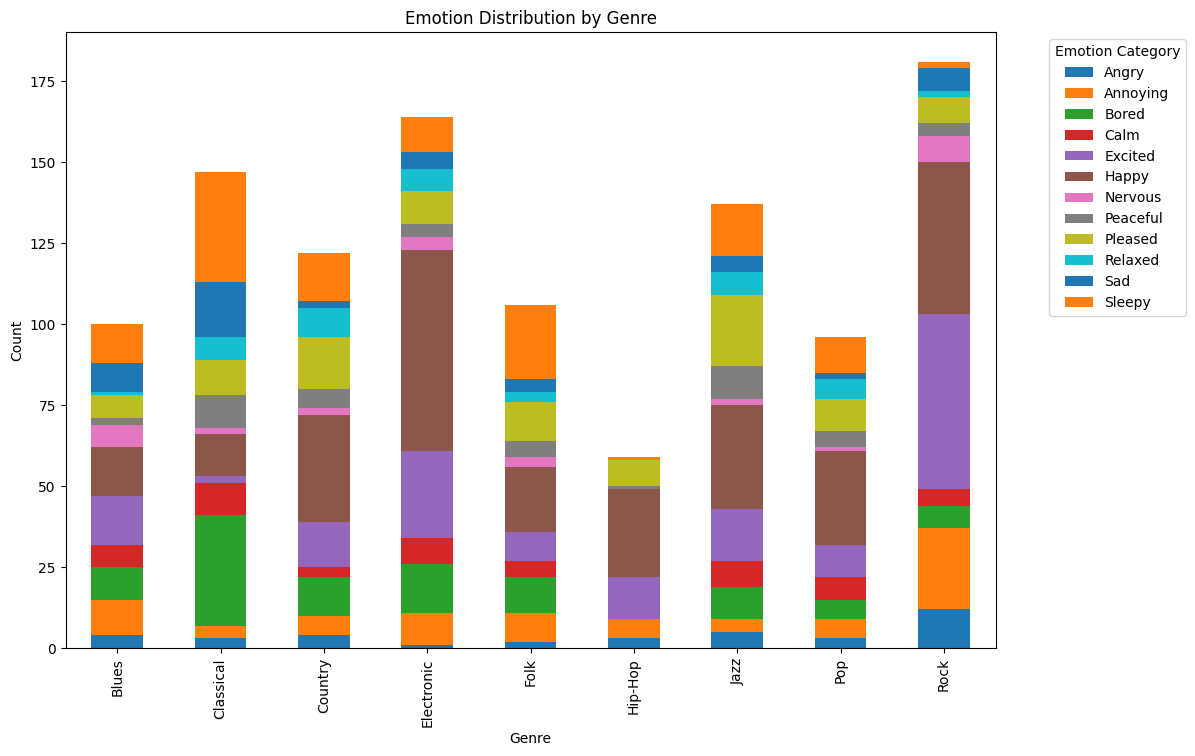

In [85]:


# metadata 2013
metadata_2013 = pd.read_csv('/content/metadata/metadata_2013.csv')

columns_to_read = ['Id', 'Artist', 'Album', 'Track', 'Genre', 'segment start', 'segment end', 'last.fm labels']
num_columns = len(columns_to_read)

# metadata 2014
metadata_2014 = pd.read_csv('/content/metadata/metadata_2014.csv', names=columns_to_read, usecols=range(num_columns), skipfooter=1, engine='python')

columns_to_read = ['Id', 'Filename', 'title', 'artist', 'album', 'genre']
num_columns = len(columns_to_read)

# metadata 2015
metadata_2015 = pd.read_csv('/content/metadata/metadata_2015.csv', names=columns_to_read, usecols=range(num_columns), skipfooter=1, engine='python')

df_genres = pd.concat([metadata_2013['Genre'].str.replace('\t', ''), metadata_2014['Genre'], metadata_2015['genre']], axis=0, ignore_index=True)

df_genres = pd.concat([df, df_genres], axis=1).rename(columns={0: 'Genre'})

# Count occurrences of each emotion category for every genre
emotion_counts_by_genre = df_genres.groupby(['Genre', 'Emotion_Category']).size().unstack(fill_value=0)

# Filter genres with fewer than 5 songs
emotion_counts_by_genre_filtered = emotion_counts_by_genre[emotion_counts_by_genre.sum(axis=1) > 50]

# Plot the bar chart
emotion_counts_by_genre_filtered.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.title('Emotion Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.legend(title='Emotion Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

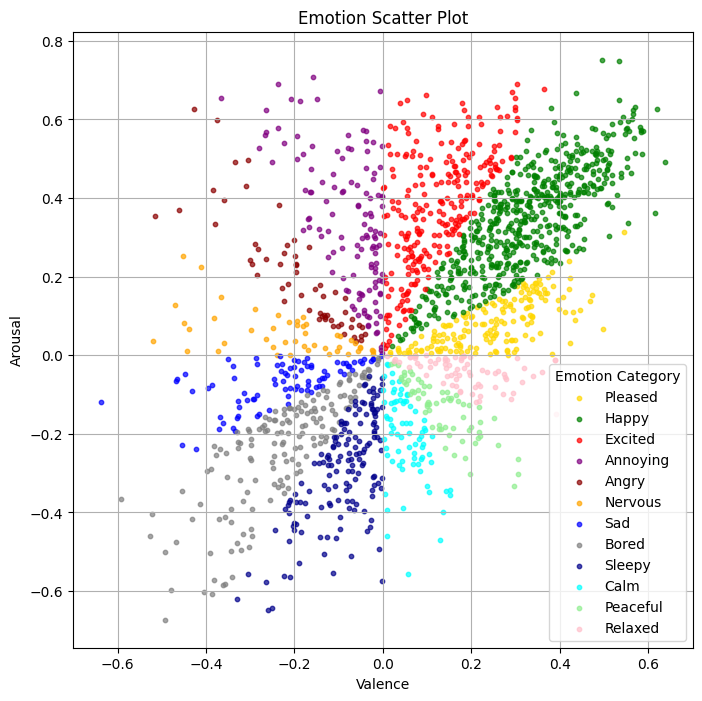

In [90]:
# Set up colors for each emotion category
emotion_colors = {
    'Pleased': 'gold', 'Happy': 'green', 'Excited': 'red',
    'Annoying': 'purple', 'Angry': 'darkred', 'Nervous': 'orange',
    'Sad': 'blue', 'Bored': 'gray', 'Sleepy': 'darkblue',
    'Calm': 'cyan', 'Peaceful': 'lightgreen', 'Relaxed': 'pink'
}

# Scatter plot with colored segments
plt.figure(figsize=(8, 8))
for emotion, color in emotion_colors.items():
    subset = df[df['Emotion_Category'] == emotion]
    plt.scatter(subset['Valence_mean'], subset['Arousal_mean'], label=emotion, color=color, s = 10, alpha=0.7)

# Customize the plot
plt.title('Emotion Scatter Plot')
plt.xlabel('Valence')
plt.ylabel('Arousal')
plt.legend(title='Emotion Category')
plt.grid(True)
plt.show()